In [1]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import os
import cv2  # Import OpenCV

# Set the path to your dataset
base_dir = 'C:\\Users\\mzain\\Desktop\\Guava\\Anza\\Guava(100)'


train_dir = os.path.join(base_dir,'train_data')
validation_dir = os.path.join(base_dir,'validation_data')
test_dir = os.path.join(base_dir,'test_data')

# Define parameters
batch_size = 16
input_shape = (512, 512, 3)
num_classes = 8


# Data augmentation and preprocessing for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=2.0,
    height_shift_range=2.0,
    shear_range=2.0,
    zoom_range=2.0,
    horizontal_flip=True,
    vertical_flip=True,
#     channel_shift_range=20, 
#     brightness_range=(0.8, 1.2),
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)


# Use input_shape[:2] for target size to match the width and height of the input_shape
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],  # Adjusted target size
    batch_size=batch_size,
    class_mode='sparse' #categorical
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],  # Adjusted target size
    batch_size=batch_size,
    class_mode='sparse' #categorical
)



model = Sequential([
    Conv2D(128, kernel_size=(2, 2), activation='relu',input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()


Found 640 images belonging to 8 classes.
Found 85 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 511, 511, 128)     1664      
                                                                 
 batch_normalization (Batch  (None, 511, 511, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 128)     65664     
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 128)     512       
 chNormalization)                        

In [2]:
# Train the model
history = model.fit(train_generator,
                    epochs=85,
                    validation_data=validation_generator) 

Epoch 1/85
40/40 [==============================] - 880s 22s/step - loss: 1.9840 - accuracy: 0.2984 - val_loss: 2.1149 - val_accuracy: 0.1176
Epoch 2/85
40/40 [==============================] - 877s 22s/step - loss: 1.4288 - accuracy: 0.4766 - val_loss: 2.2824 - val_accuracy: 0.1176
Epoch 3/85
40/40 [==============================] - 877s 22s/step - loss: 1.2785 - accuracy: 0.5453 - val_loss: 2.4985 - val_accuracy: 0.1176
Epoch 4/85
40/40 [==============================] - 880s 22s/step - loss: 0.9959 - accuracy: 0.6281 - val_loss: 3.3628 - val_accuracy: 0.1176
Epoch 5/85
40/40 [==============================] - 874s 22s/step - loss: 0.9449 - accuracy: 0.6609 - val_loss: 3.4845 - val_accuracy: 0.1176
Epoch 6/85
40/40 [==============================] - 874s 22s/step - loss: 0.7089 - accuracy: 0.7594 - val_loss: 4.5315 - val_accuracy: 0.1176
Epoch 7/85
40/40 [==============================] - 869s 22s/step - loss: 0.7517 - accuracy: 0.7484 - val_loss: 4.2185 - val_accuracy: 0.1176
Epoch 

In [21]:

# initial_epoch = 80  # Set this to the last epoch completed.

# # Continue training for additional epochs.
# history = model.fit(train_generator,
#                     initial_epoch=initial_epoch,  # Set the initial epoch.
#                     epochs=85,  # Set the total number of desired epochs.
#                     validation_data=validation_generator)

In [19]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],  # Adjusted target size
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 80 images belonging to 8 classes.
5/5 [==============================] - 26s 5s/step - loss: 0.1428 - accuracy: 0.9625
Test Loss: 0.14280803501605988
Test Accuracy: 0.9624999761581421


In [33]:
# Predict the labels for the test set
test_pred = model.predict(test_generator)
test_labels = np.argmax(test_pred, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Calculate performance metrics
print("Confusion Matrix:")
print(confusion_matrix(true_labels, test_labels))

print("\nClassification Report:")
print(classification_report(true_labels, test_labels, target_names=train_generator.class_indices.keys()))

5/5 [==============================] - 25s 5s/step
Confusion Matrix:
[[10  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  1  0]
 [ 0  0 10  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  8  2]
 [ 0  0  0  0  0  0  0 10]]

Classification Report:
              precision    recall  f1-score   support

  10-Guava-J       1.00      1.00      1.00        10
  11-Guava-K       1.00      0.90      0.95        10
  12-Guava-L       1.00      1.00      1.00        10
   5-Guava-E       1.00      1.00      1.00        10
   6-Guava-F       1.00      1.00      1.00        10
   7-Guava-G       1.00      1.00      1.00        10
   8-Guava-H       0.89      0.80      0.84        10
   9-Guava-I       0.83      1.00      0.91        10

    accuracy                           0.96        80
   macro avg       0.97      0.96      0.96        80
weighted avg       0.97      0.96      0.96        80



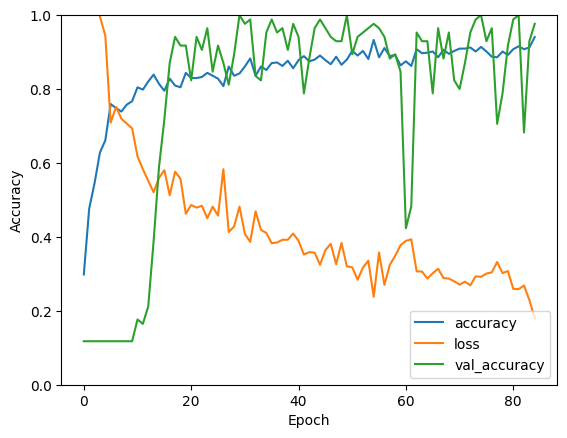

In [34]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


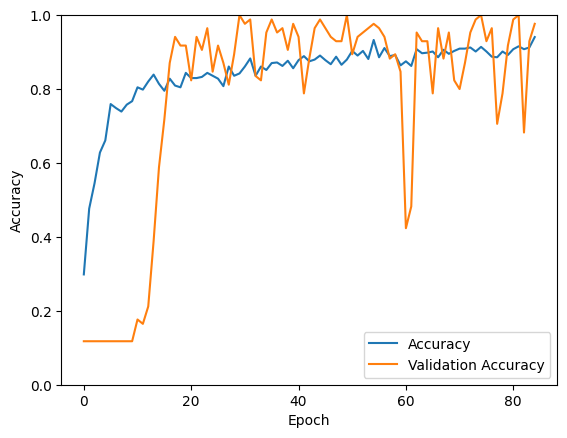

In [35]:
# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


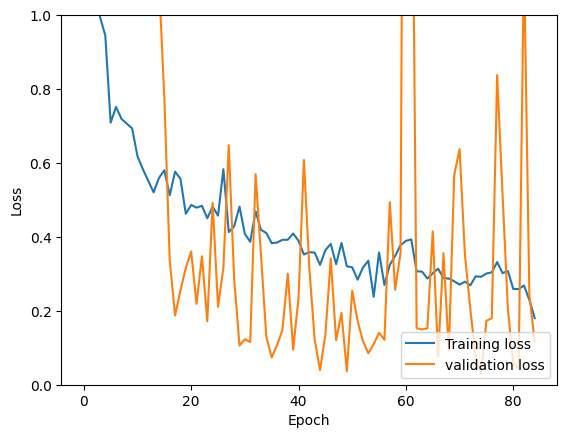

In [36]:
# Plot training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [32]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Predict the labels for the test set
test_pred = model.predict(test_generator)

# Get the true labels
true_labels = test_generator.classes

# Convert true labels to binary format
true_labels_binary = label_binarize(true_labels, classes=np.unique(true_labels))

# Compute ROC curve and AUC for each class
n_classes = true_labels_binary.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binary[:, i], test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-averaged AUC
micro_roc_auc = roc_auc_score(true_labels_binary, test_pred, multi_class='ovr', average='micro')

# Print AUC values for each class
print("AUC for each class:")
for i in range(n_classes):
    print(f"Class {i}: AUC = {roc_auc[i]:.4f}")

# Print micro-averaged AUC
print("\nMicro-averaged AUC:", micro_roc_auc)

# Compute confusion matrix for MCC
conf_matrix = confusion_matrix(true_labels, np.argmax(test_pred, axis=1))

# Compute micro-averaged MCC
micro_mcc = matthews_corrcoef(true_labels, np.argmax(test_pred, axis=1))

# Print MCC for each class
print("\nMCC for each class:")
for i in range(n_classes):
    mcc = matthews_corrcoef(true_labels_binary[:, i], (test_pred[:, i] > 0.5).astype(int))
    print(f"Class {i}: MCC = {mcc:.4f}")

# Print micro-averaged MCC
print("\nMicro-averaged MCC:", micro_mcc)


5/5 [==============================] - 25s 5s/step
AUC for each class:
Class 0: AUC = 1.0000
Class 1: AUC = 1.0000
Class 2: AUC = 1.0000
Class 3: AUC = 1.0000
Class 4: AUC = 1.0000
Class 5: AUC = 1.0000
Class 6: AUC = 0.9900
Class 7: AUC = 0.9957

Micro-averaged AUC: 0.9978348214285714

MCC for each class:
Class 0: MCC = 1.0000
Class 1: MCC = 0.9420
Class 2: MCC = 1.0000
Class 3: MCC = 1.0000
Class 4: MCC = 1.0000
Class 5: MCC = 1.0000
Class 6: MCC = 0.8224
Class 7: MCC = 0.8997

Micro-averaged MCC: 0.9576560246484818


In [27]:
model.save_weights('final_model_weights.h5')


# Manual Testing

In [3]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import os
import cv2  # Import OpenCV

# Set the path to your dataset
base_dir = 'C:\\Users\\mzain\\Desktop\\Guava\\Anza\\Guava(100)'


train_dir = os.path.join(base_dir,'train_data')
validation_dir = os.path.join(base_dir,'validation_data')
test_dir = os.path.join(base_dir,'test_data')

# Define parameters
batch_size = 16
input_shape = (512, 512, 3)
num_classes = 8





model = Sequential([
    Conv2D(128, kernel_size=(2, 2), activation='relu',input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


Found 640 images belonging to 8 classes.
Found 79 images belonging to 8 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 511, 511, 128)     1664      
                                                                 
 batch_normalization (Batch  (None, 511, 511, 128)     512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 128)     65664     
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 128)     512       
 chNormalization)                        

In [4]:
import os

# Path to your saved weights
weights_path = 'C:\\Users\\mzain\\Desktop\\Guava\\Anza\\final_model_weights.h5'

# Check if the weights file exists
if os.path.exists(weights_path):
    model.load_weights(weights_path)
    print("Weights loaded successfully.")
else:
    print("Weights file not found.")

Weights loaded successfully.


In [5]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],  # Adjusted target size
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Found 80 images belonging to 8 classes.
5/5 [==============================] - 52s 10s/step - loss: 0.1428 - accuracy: 0.9625
Test Loss: 0.14280803501605988
Test Accuracy: 0.9624999761581421


In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
image_path = 'C:\\Users\\mzain\\Desktop\\Guava\\Anza\\Guava(100)\\test_data\\8-Guava-H\\H_(65).jpg'

img = image.load_img(image_path, target_size=input_shape[:2])
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array /= 255.0  # Normalize pixel values

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction
predicted_class = np.argmax(prediction)  # Get the index of the class with highest probability
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

print("Predicted Class:", predicted_label)
print("Prediction Probabilities:", prediction)

1/1 [==============================] - 1s 644ms/step
Predicted Class: 8-Guava-H
Prediction Probabilities: [[4.0903565e-04 4.3800686e-05 1.0448399e-03 9.7873487e-02 5.2359205e-04
  6.0710381e-03 8.6712223e-01 2.6912052e-02]]
